In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import compute_pers, calc_bottleneck, downsample_average, SEDT
from generate_examples import create_diskwithmanyspots
# %matplotlib notebook

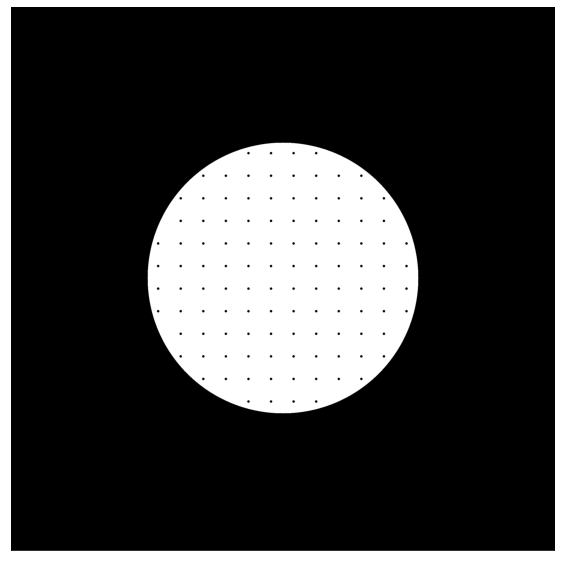

In [2]:
data = create_diskwithmanyspots()

plt.figure(figsize=(10,10))
plt.imshow(data, cmap='binary_r')
# plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.savefig('DiskManyDots.png', dpi=300, bbox_inches='tight')

In [3]:
HR_binary = np.copy(data)
HR_size = len(data)

kernel_size_list = [int(HR_size/i) for i in range(4,HR_size//2+1) if HR_size/i == int(HR_size/i)]
kernel_size_list

[512, 256, 128, 64, 32, 16, 8, 4, 2]

In [4]:
# Compute SEDT images
binary_image_list = [] # list of binary images
sedt_image_list = [] # list of sedt images
num_pixels_list = [] # list keeping track of resolution
for ks in kernel_size_list:
    # Downsample with threshold t=0.5
    img = downsample_average(HR_binary, ks, t=0.5)
    
    # Keep list of binary images
    binary_image_list.append(np.copy(img))
        
    sedt = SEDT(img)
    
    num_pixels_list.append(len(sedt))
    
    # Scale SEDT
    scale = HR_size/len(sedt)
    sedt_image_list.append( sedt*scale )
        
# lastly add in high resolution version
binary_image_list.append(np.copy(HR_binary))
sedt_image_list.append(SEDT(HR_binary))
num_pixels_list.append(HR_size)

### Compute Persistence Diagrams

In [5]:
All_Dgms = []
maxes = []
mins = []
for i,image in enumerate(sedt_image_list):
    
    # Keep track of max and mins of images
    maxes.append(np.amax(image))
    mins.append(np.amin(image))
    
    # Compute pers dgms
    dgms = compute_pers(image, dgm_format='giotto') # Diagrams from T Construction
    
    # Keep list of all diagrams
    All_Dgms.append(dgms)

### Compute Bottleneck distance

In [6]:
bdists_0_HR = []
dim = 0
for i in range(len(All_Dgms)):
    dgm_a = All_Dgms[i][0]
    dgm_a = dgm_a[dgm_a[:,2] == dim]
    
    dgm_b = All_Dgms[-1][0]
    dgm_b = dgm_b[dgm_b[:,2] == dim]

    d = calc_bottleneck(dgm_a, dgm_b)
    bdists_0_HR.append( d )
    
bdists_1_HR = [] 
dim = 1
for i in range(len(All_Dgms)):
    dgm_a = All_Dgms[i][0]
    dgm_a = dgm_a[dgm_a[:,2] == dim]
    
    dgm_b = All_Dgms[-1][0]
    dgm_b = dgm_b[dgm_b[:,2] == dim]

    d = calc_bottleneck(dgm_a, dgm_b)
    bdists_1_HR.append( d )

### Plot examples of binary images and SEDTS

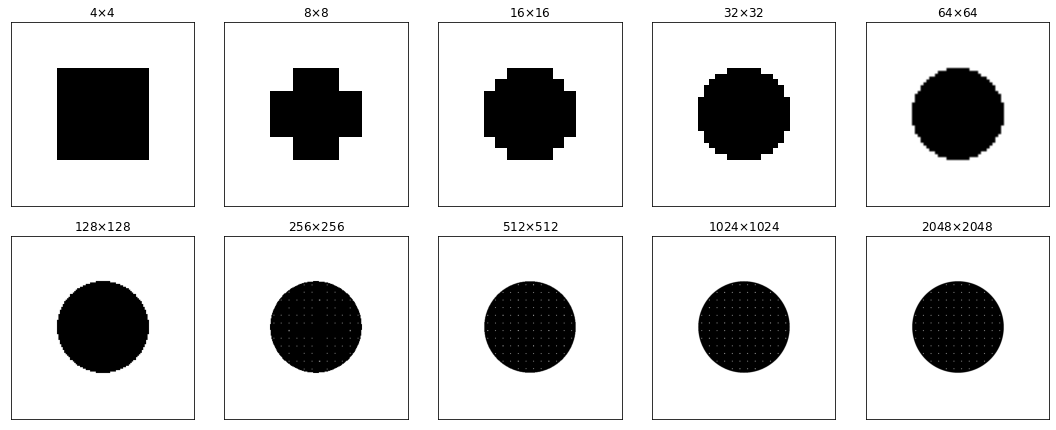

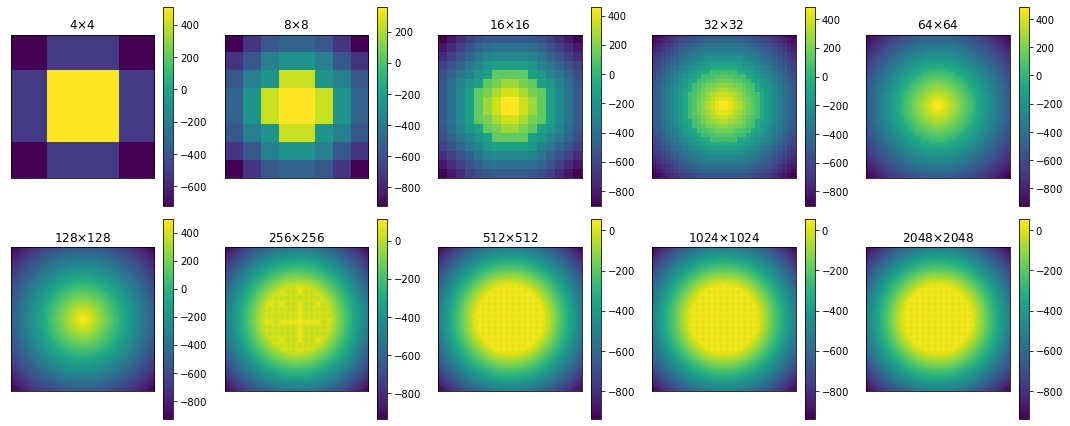

In [7]:
nplots = 15
if nplots > 0:
    plt.figure(figsize=(5*3, 3*3))
    for i in range(len(binary_image_list[:nplots])):
        plt.subplot(3, 5, i+1)
        plt.imshow(binary_image_list[i], cmap='binary')
        plt.xticks([])
        plt.yticks([])
        plt.title(rf'{num_pixels_list[i]}$\times${num_pixels_list[i]}')
    plt.tight_layout()
    
if nplots > 0:
    plt.figure(figsize=(5*3, 3*3))
    for i in range(len(binary_image_list[:nplots])):
        plt.subplot(3, 5, i+1)
        plt.imshow(sedt_image_list[i])
        plt.colorbar()
        plt.xticks([])
        plt.yticks([])
        plt.title(rf'{num_pixels_list[i]}$\times${num_pixels_list[i]}')
    plt.tight_layout()

### Plot two examples binary image and SEDT 

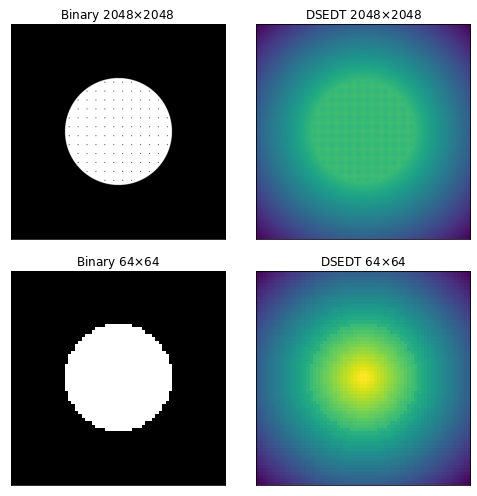

In [8]:
plt.figure(figsize=(7,7))

plt.subplot(2,2,1)
plt.imshow(-1*(binary_image_list[-1]-1),cmap='binary')
plt.xticks([])
plt.yticks([])
plt.title(fr'Binary {num_pixels_list[-1]}$\times${num_pixels_list[-1]}')

plt.subplot(2,2,2)
plt.imshow(sedt_image_list[-1])
plt.xticks([])
plt.yticks([])
plt.clim([ min(np.amin(sedt_image_list[-1]), np.amin(sedt_image_list[-6])), max(np.amax(sedt_image_list[-1]), np.amax(sedt_image_list[-6]))])
plt.title(fr'DSEDT {num_pixels_list[-1]}$\times${num_pixels_list[-1]}')

plt.subplot(2,2,3)
plt.imshow(-1*(binary_image_list[-6]-1),cmap='binary')
plt.xticks([])
plt.yticks([])
plt.title(fr'Binary {num_pixels_list[-6]}$\times${num_pixels_list[-6]}')

plt.subplot(2,2,4)
plt.imshow(sedt_image_list[-6])
plt.xticks([])
plt.yticks([])
plt.clim([ min(np.amin(sedt_image_list[-1]), np.amin(sedt_image_list[-6])), max(np.amax(sedt_image_list[-1]), np.amax(sedt_image_list[-6]))])
plt.title(fr'DSEDT {num_pixels_list[-6]}$\times${num_pixels_list[-6]}')

plt.tight_layout()
plt.savefig('Figs/DiskWithManySpots_viridis.png', dpi=300,bbox_inches='tight')

### Plot bottleneck distance vs resolution and bottleneck distance vs pixel size

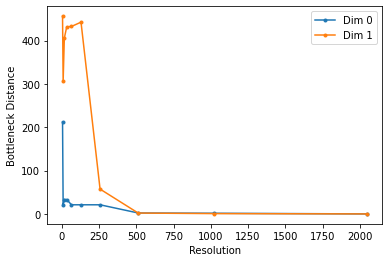

In [9]:
fig, ax1 = plt.subplots(figsize=(6,4))
plt.plot(np.array(num_pixels_list), bdists_0_HR, label='Dim 0',marker='.')
plt.plot(np.array(num_pixels_list),bdists_1_HR, label='Dim 1',marker='.')

plt.xlabel('Resolution')
plt.ylabel('Bottleneck Distance')
plt.legend()

plt.savefig('Figs/DiskWithManySpots_Simple_Resolution.png', dpi=300, bbox_inches='tight')

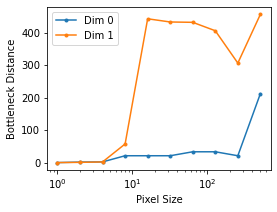

In [10]:
plt.figure(figsize=(4,3))
plt.semilogx(2048/np.array(num_pixels_list), bdists_0_HR, label='Dim 0',marker='.')
plt.plot(2048/np.array(num_pixels_list),bdists_1_HR, label='Dim 1',marker='.')

plt.xlabel('Pixel Size')
plt.ylabel('Bottleneck Distance')
plt.legend()

plt.savefig('Figs/DiskWithManySpots_Simple_PixelSize_Log.png', dpi=300, bbox_inches='tight')